# Predicting Machine Failure
The manufacturing team has been suffering consistent machine breakdowns and they want to be able to idenfy it before it's likely to happen through their sensor data. The existing machines have a number of sensors but they're not too sure which help identify failure.

## Connect to SQL Database

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [2]:
# Connect to SQL Database
DB_PATH = os.path.join('database', 'iot.db')
con = sqlite3.connect(DB_PATH)
cursor = con.cursor()

## Check What Tables are Available

In [3]:
TABLE_SELECTION_STATMENT = "SELECT name FROM sqlite_master WHERE type='table';"
table_result = cursor.execute(TABLE_SELECTION_STATMENT).fetchall()
print(table_result)

[('training',), ('scoring',)]


## Get All the Data

In [4]:
DATA_SELECTION_STATMENT = "SELECT * FROM training;"
data = cursor.execute(DATA_SELECTION_STATMENT).fetchall()


In [5]:
# Capture columns for conversion to pandas
cols = np.array(cursor.description)[:, 0]
cols

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5',
       'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10',
       'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15',
       'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20',
       'Sensor 21', 'Sensor 22', 'Sensor 23', 'Sensor 24', 'Sensor 25',
       'Sensor 26', 'Sensor 27', 'Sensor 28', 'Sensor 29', 'Sensor 30',
       'Sensor 31', 'Sensor 32', 'Sensor 33', 'Sensor 34', 'Sensor 35',
       'Sensor 36', 'Sensor 37', 'Sensor 38', 'Sensor 39', 'Sensor 40',
       'Sensor 41', 'Sensor 42', 'Sensor 43', 'Sensor 44', 'Sensor 45',
       'Sensor 46', 'Sensor 47', 'Sensor 48', 'Sensor 49', 'Sensor 50',
       'Sensor 51', 'Sensor 52', 'Sensor 53', 'Sensor 54', 'Sensor 55',
       'Sensor 56', 'Sensor 57', 'Sensor 58', 'Sensor 59', 'Sensor 60',
       'Sensor 61', 'Sensor 62', 'Sensor 63', 'Sensor 64', 'Sensor 65',
       'Sensor 66', 'Sensor 67', 'Sensor 68', 'Sensor 69', 'Sensor 70',
 

In [6]:
#Close connection
cursor.close()

# Establish dataframe
df = pd.DataFrame(data, columns=cols)

In [7]:
df

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Machine Failure
0,2.106008,1.765494,0.072488,0.164543,2.928143,1.645433,1.819063,0.332035,0.665590,24.531377,...,1.668703,-1.748165,0.075639,2.383862,-0.556234,0.152506,51.825760,49.461068,14.322512,Running
1,2.400997,0.410752,0.745569,1.467640,-1.136906,14.676396,0.257288,0.892593,1.418290,18.658616,...,1.835808,-1.923228,1.488724,2.622583,-0.611936,1.178079,5.891962,42.905350,14.279731,Running
2,0.675427,1.217458,1.491454,0.658602,0.947287,6.586024,2.771511,5.866576,1.928395,27.855573,...,1.411937,-1.479172,-0.942776,2.017053,-0.470646,1.153371,21.134473,-54.254697,14.196304,Running
3,0.295065,2.583267,1.397774,1.222003,0.384710,12.220032,2.332653,14.873609,3.130726,41.486420,...,-0.843319,0.883477,0.568646,-1.204742,0.281106,0.932500,33.129568,44.200473,14.168624,Running
4,1.745153,1.174935,2.206422,1.793800,0.646555,17.937999,2.027426,2.042624,0.336993,9.490009,...,-0.490529,0.513887,-0.244071,-0.700755,0.163510,0.737156,45.813705,42.141305,14.189116,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,2.577296,1.352424,3.037584,1.610227,1.973605,16.102270,1.884709,2.442188,0.482835,8.357039,...,3.899416,-4.085103,0.123789,5.570594,-1.299805,0.598016,-16.364955,36.696740,14.278774,Running
6526,-1.012850,-0.676150,2.283764,0.887017,1.350148,8.870172,1.048006,1.125507,0.726446,16.183621,...,2.752071,-2.883122,-1.342645,3.931530,-0.917357,1.867014,11.395306,72.749409,14.329014,Running
6527,0.343996,0.700393,0.593080,1.147918,1.337089,11.479182,3.562884,-4.833068,-0.709025,12.690834,...,0.950761,-0.996035,-0.919128,1.358230,-0.316920,0.283070,24.125890,5.349517,14.221959,Running
6528,0.253049,0.235872,1.493264,1.027933,0.486573,10.279328,0.689453,3.912608,3.312444,21.224274,...,3.451241,-3.615586,1.426878,4.930344,-1.150414,4.769110,27.749275,43.900908,14.392922,Running


In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, stratify=df['Machine Failure'], test_size=0.3, random_state=420)

## Exploratory Data Analysis

In [9]:
train.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,...,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,1.001907,0.983173,0.985475,0.993131,1.003178,9.931310,1.022438,1.648467,0.978947,14.949850,...,1.990311,2.089826,-2.189342,1.027734,2.985466,-0.696609,1.004658,15.095608,44.077242,14.284043
std,0.991476,0.995358,0.999753,1.017211,1.018852,10.172105,1.012572,4.370257,1.001826,15.060232,...,2.040135,2.142142,2.244148,1.006612,3.060202,0.714047,1.709292,14.692802,45.017738,0.110152
min,-2.315177,-2.534693,-2.280546,-2.554940,-3.002302,-25.549395,-2.968328,-22.621893,-2.427089,-40.096520,...,-6.342845,-6.659987,-9.483388,-2.570233,-9.514267,-3.017442,-4.466458,-34.983084,-112.653721,14.014133
25%,0.344141,0.309731,0.315043,0.307485,0.332711,3.074846,0.343901,-0.171160,0.319903,4.762364,...,0.617692,0.648576,-3.692765,0.359757,0.926538,-1.174971,-0.009615,5.248663,14.224822,14.211128
50%,1.001535,0.964311,0.977827,0.983565,0.994990,9.835647,0.999661,0.477084,0.982004,15.163750,...,2.002973,2.103121,-2.203270,1.034881,3.004459,-0.701040,0.583010,15.198015,44.854987,14.269181
75%,1.651213,1.665937,1.659147,1.683223,1.694942,16.832226,1.707024,2.667511,1.652321,24.934829,...,3.357059,3.524912,-0.679461,1.700744,5.035588,-0.216192,1.768423,24.757125,73.382831,14.341046
max,4.584227,4.567490,4.532265,4.831581,4.903919,48.315807,4.609980,45.613789,4.811394,67.392277,...,8.621262,9.052325,6.977129,4.992360,12.931892,2.219996,11.777993,66.635282,197.449758,14.990226


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

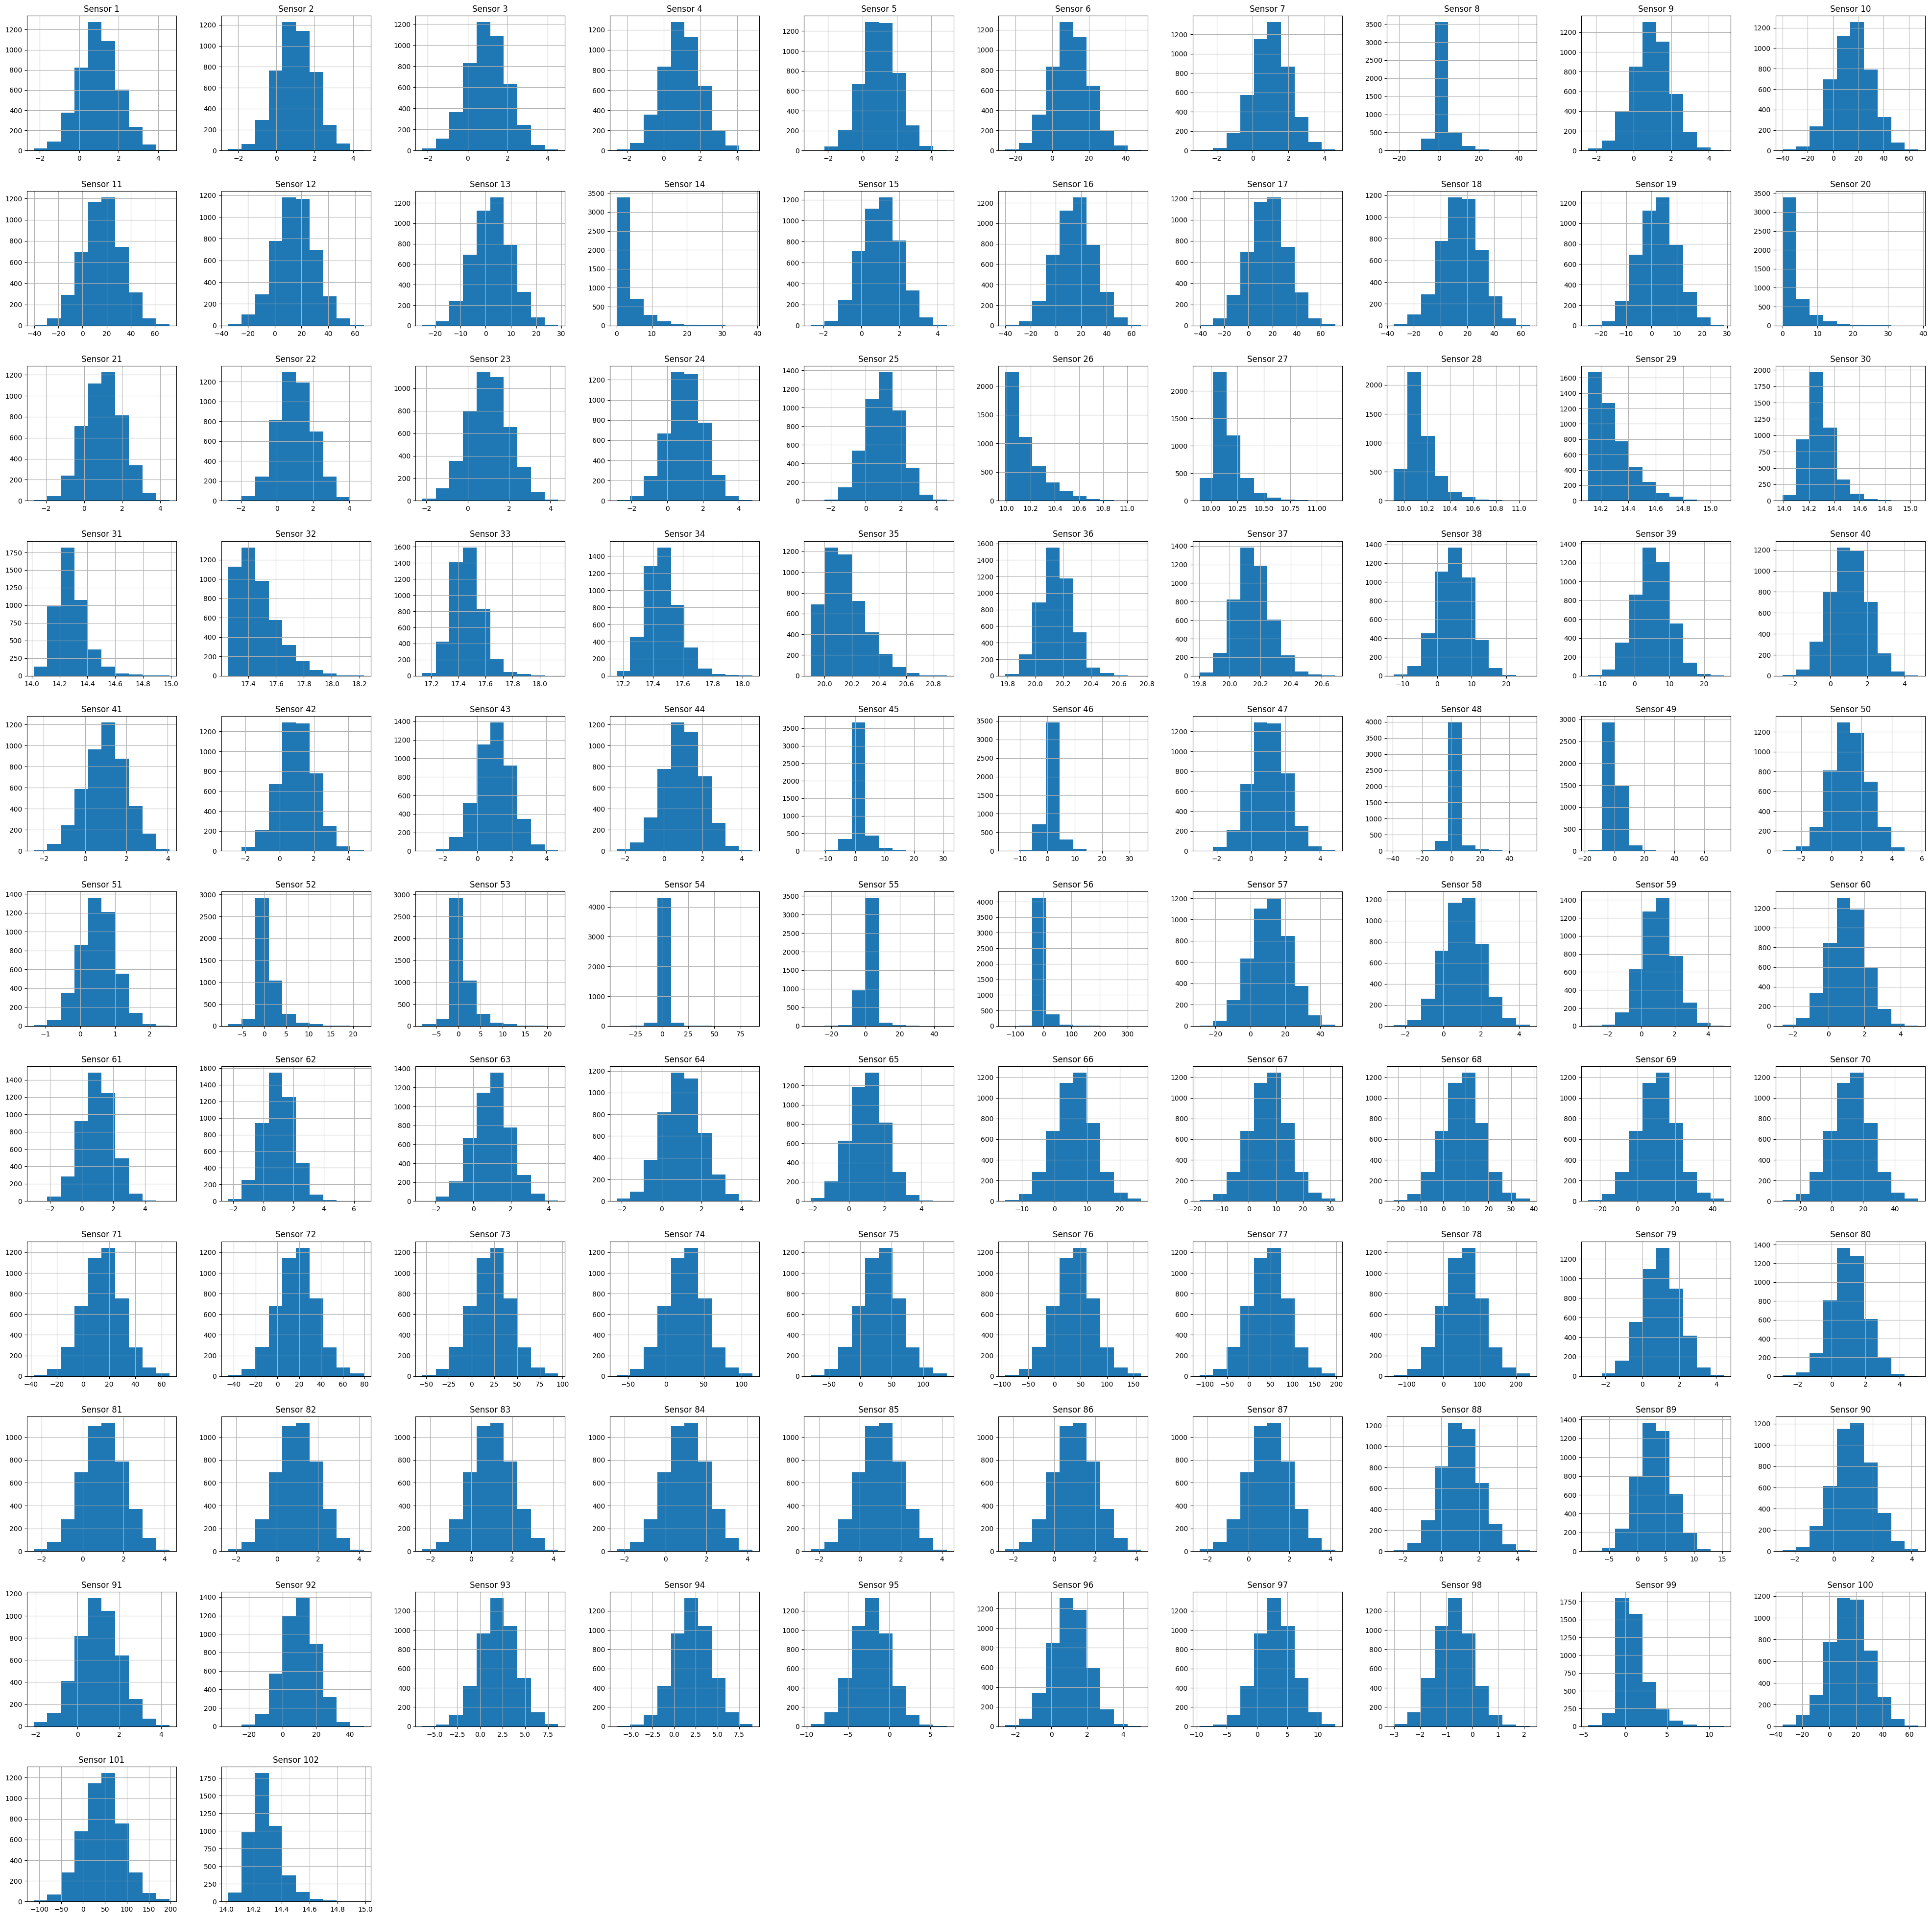

In [11]:
train.hist(figsize=(50,50))
plt.show()

### Correlation Exploration

<Axes: title={'center': 'Pearsons Correlation'}>

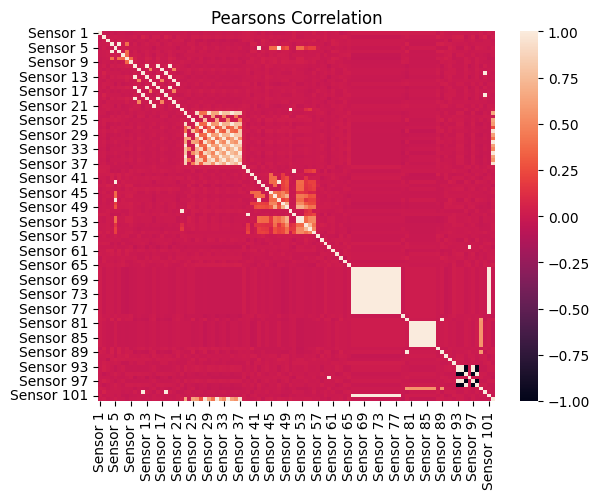

In [12]:
plt.title("Pearsons Correlation")
sns.heatmap(train.select_dtypes(exclude=["object"]).corr())

In [13]:
# Convert target to binary column called OneHotTarget
temp = train.copy()
temp['OneHotTarget'] = temp['Machine Failure'].apply(lambda x: 1 if x=='Failure' else 0)

<Axes: title={'center': 'Pearsons Correlation + OneHot'}>

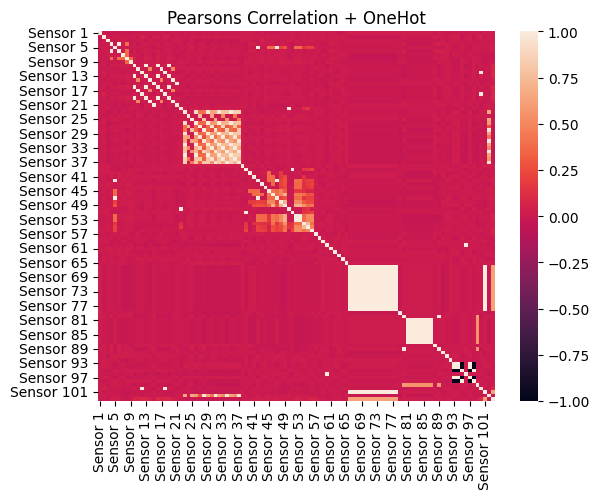

In [14]:
plt.title("Pearsons Correlation + OneHot")
sns.heatmap(temp.select_dtypes(exclude=["object"]).corr())

#### The Label is unfortunately not shown in the chart
#### But it appears as a line where the 'last' sensor would be reported
#### Sensors ~65-80 appear to have a correlation with our 1-hot encoded labels

<Axes: title={'center': 'Pearsons Correlation 1-Hot Zoomed'}>

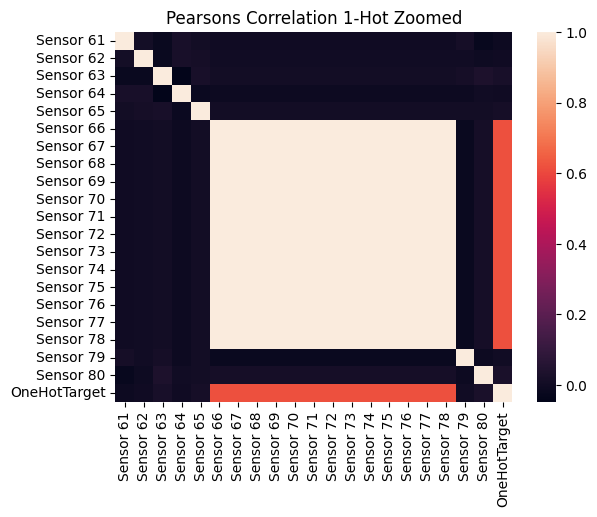

In [15]:
columns_to_analyze = [*list(temp.columns[60:80]), 'OneHotTarget']
plt.title("Pearsons Correlation 1-Hot Zoomed")
sns.heatmap(temp[columns_to_analyze].select_dtypes(exclude=["object"]).corr())


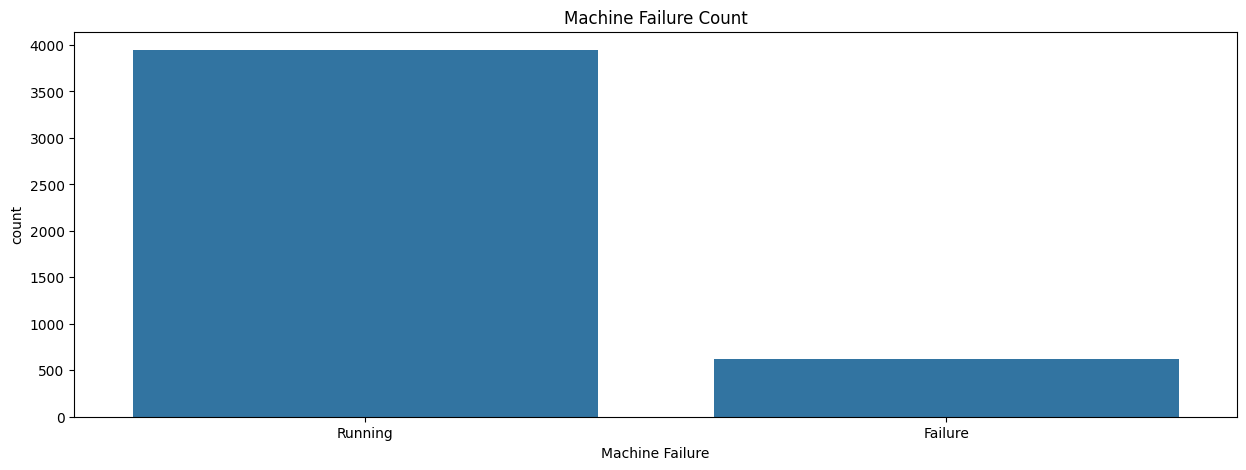

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Machine Failure", data=train).set_title("Machine Failure Count")
plt.show()


## Preprocessing

### Split Features and Targets

In [17]:
# Standard splitting proceedures
X_train = train.drop("Machine Failure", axis=1)
y_train = train['Machine Failure']
X_test = test.drop("Machine Failure", axis=1)
y_test = test['Machine Failure']

### Rebalance Data

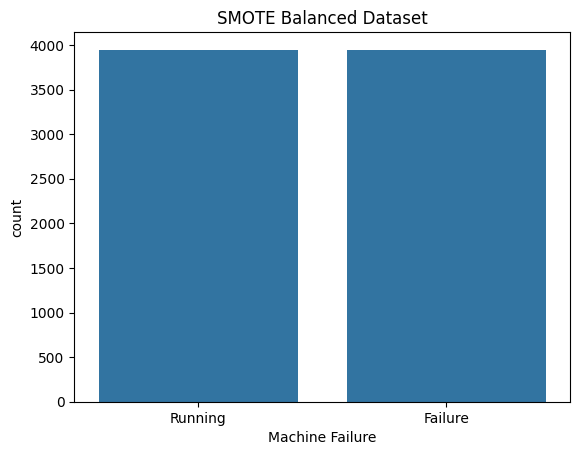

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=420)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

sns.countplot(x=y_sm).set_title("SMOTE Balanced Dataset")
plt.show()

## Principal Component Analysis (PCA) for Dimensionality Reduction

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Training a PCA Model

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_sm)

In [21]:
sd_container = pd.DataFrame(scaled_data)

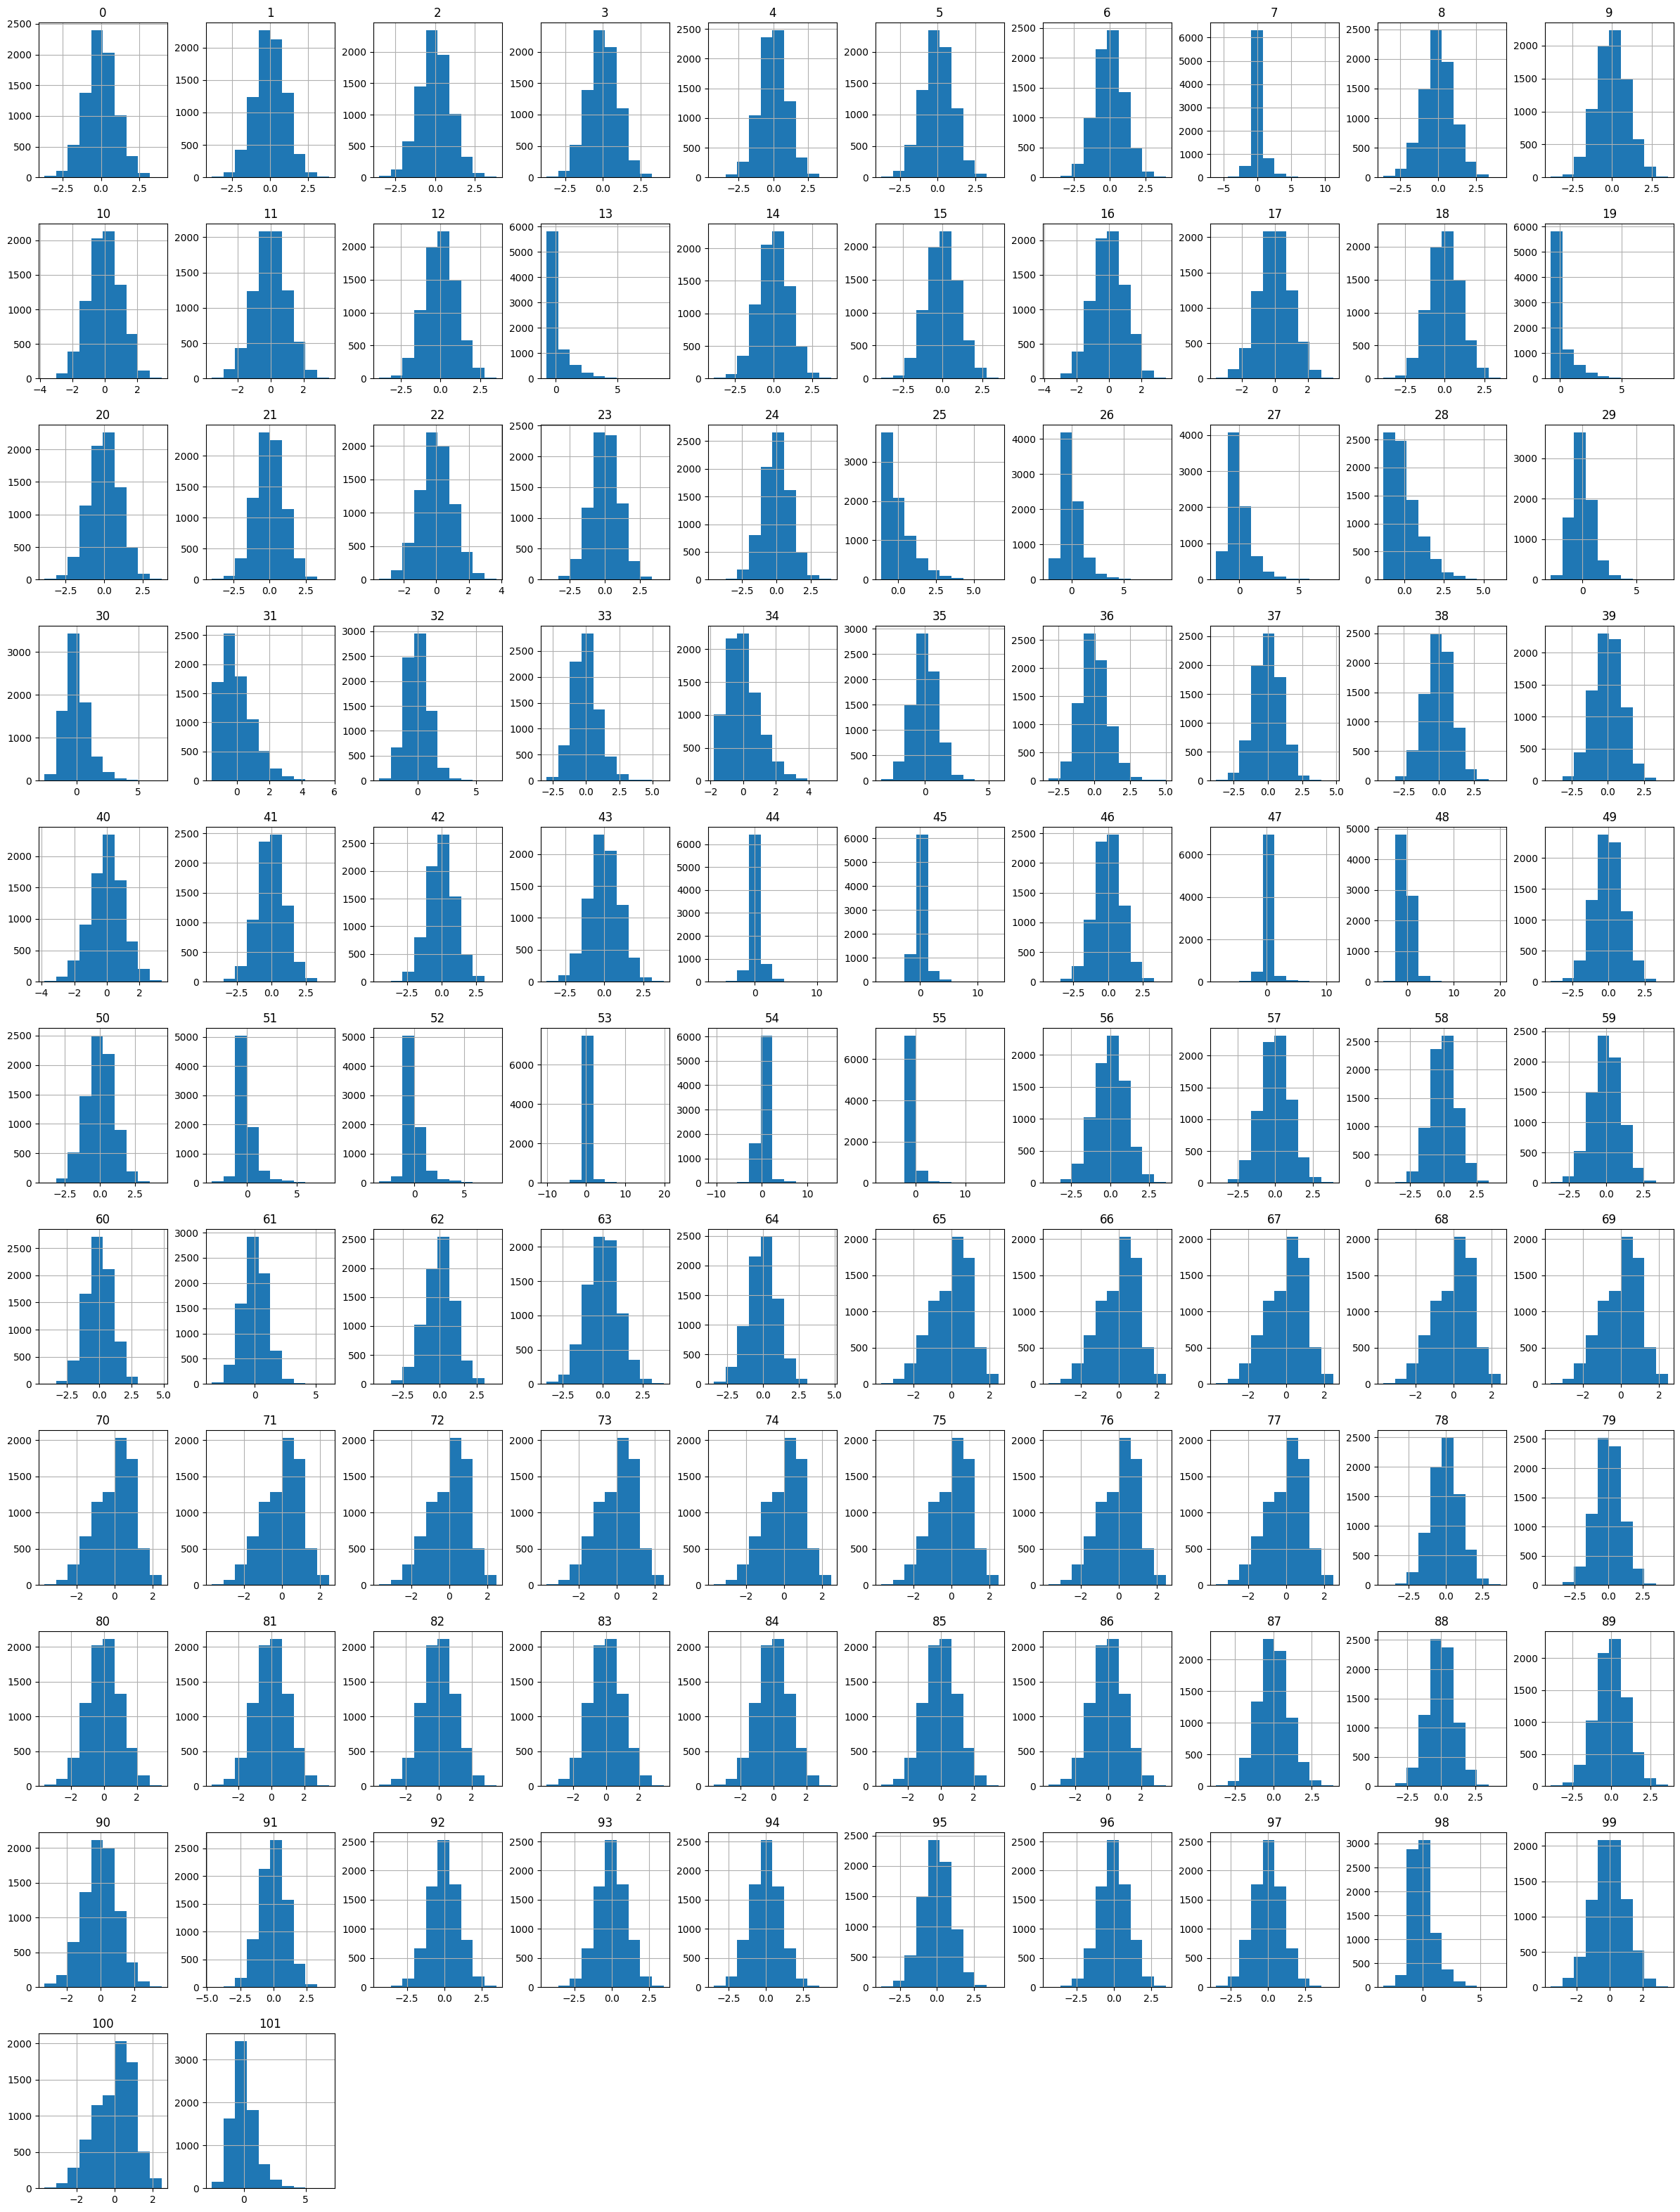

In [22]:
sd_container.hist(figsize=(30,40))
plt.show()

In [23]:
fit_pca = {}
pca_range = [*range(2, len(X_sm.columns) - 1)]
for component in pca_range:
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    fit_pca[component] = pca

## Evaluating Components using a Scree Plot

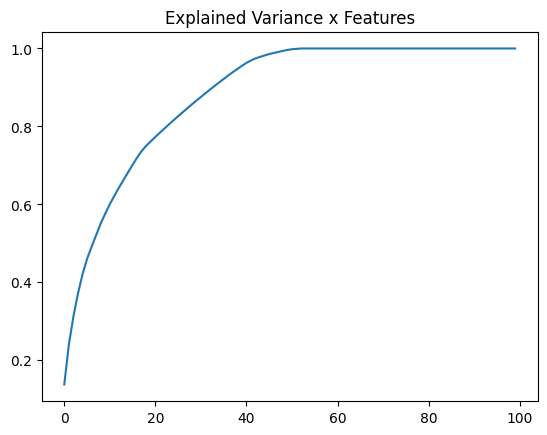

In [24]:
plt.plot(fit_pca[pca_range[-1]].explained_variance_ratio_.cumsum())
plt.title("Explained Variance x Features")
plt.show()

# Modeling

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier, SGDClassifier #Stochastic Gradient Descent
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import math


### @TODO: Programatically compute the number of PCA features to use (90% of variance or greater)

In [40]:
NUMBER_OF_FEATURES = math.ceil(len(pca_range) / 2)
NUMBER_OF_FEATURES


50

In [39]:
pipelines = {
    'sgd': make_pipeline(StandardScaler(), PCA(n_components=NUMBER_OF_FEATURES), SGDClassifier(random_state=420)),
    'ridge': make_pipeline(StandardScaler(), PCA(n_components=NUMBER_OF_FEATURES), RidgeClassifier(random_state=420)),
    'rf': make_pipeline(StandardScaler(), PCA(n_components=NUMBER_OF_FEATURES), RandomForestClassifier(random_state=420)),
    'gb': make_pipeline(StandardScaler(), PCA(n_components=NUMBER_OF_FEATURES), GradientBoostingClassifier(random_state=420))
}

### @TODO: Explore Options for Hyperparameter Optimization

In [43]:
# pipelines['sgd'].get_params()
# pipelines['ridge'].get_params()
# pipelines['rf'].get_params()
# pipelines['gb'].get_params()

In [45]:
hyperparameter_tuning_grid = {
    'sgd': {
        'sgdclassifier__alpha': [0.0001, 0.0001, 0.001, 0.01]
    },
    'ridge': {
        'ridgeclassifier__alpha': [0.01, 0.5, 1.0, 2.0, 3.0]
    },
    'rf': {
        'randomforestclassifier__n_estimators': [50, 100, 200, 300, 400],
        'randomforestclassifier__max_depth': [None, 5, 7 ,9],
    },
    'gb': {
        'gradientboostingclassifier__n_estimators': [50, 100, 200, 300, 400],
        'gradientboostingclassifier__max_depth': [None, 5, 7 ,9],
    }
}

## Train PCA Factored Models

In [46]:
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print("Fitting {}...".format(algo))
        model = GridSearchCV(pipeline, hyperparameter_tuning_grid[algo], cv=10, n_jobs=-1)
        model.fit(X_sm, y_sm)
        fit_models[algo] = model
        print("Training completed for {}".format(algo))
    except Exception as e:
        print(e)

Fitting sgd...


Training completed for sgd
Fitting ridge...
Training completed for ridge
Fitting rf...
Training completed for rf
Fitting gb...
Training completed for gb


# 7. Evaluate

## Calculate Classification Metrics

## Review Confusion Matrix

# 8. Deploy

## Save Model

## Load Model and PCA

## Call New Data to Be Scored

## Make Predictions

## Check if Predictions Table Exists, If Not Create It

## Push back into Database

## View Loaded Results